# Netflix analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('c:\\Users\\HP\\Downloads\\netflix_titles.csv')

In [26]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
data.shape

(8807, 12)

In [28]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [30]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
data.fillna({'rating':'unavailabe','cast':'unavailable','country':'unavailable','director':'unavailable','date_added':'unavailable'},inplace=True)
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [32]:
data.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

# visualization

Text(0.5, 1.0, 'count vs type of shows')

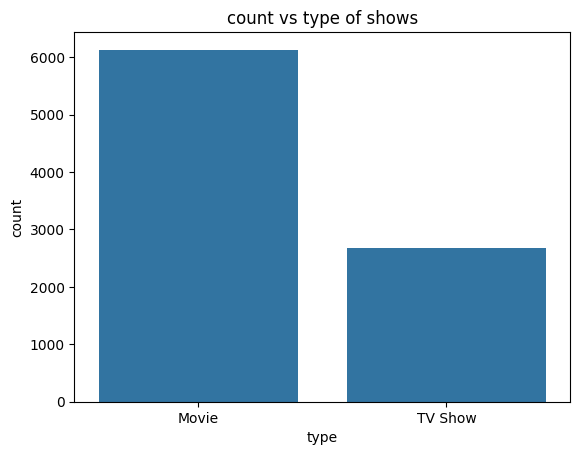

In [33]:
sns.countplot(x='type',data=data)
plt.title('count vs type of shows')

In [34]:
data['country'].value_counts().head(10)

country
United States     2818
India              972
unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

Text(0.5, 1.0, 'country wise content on netflix')

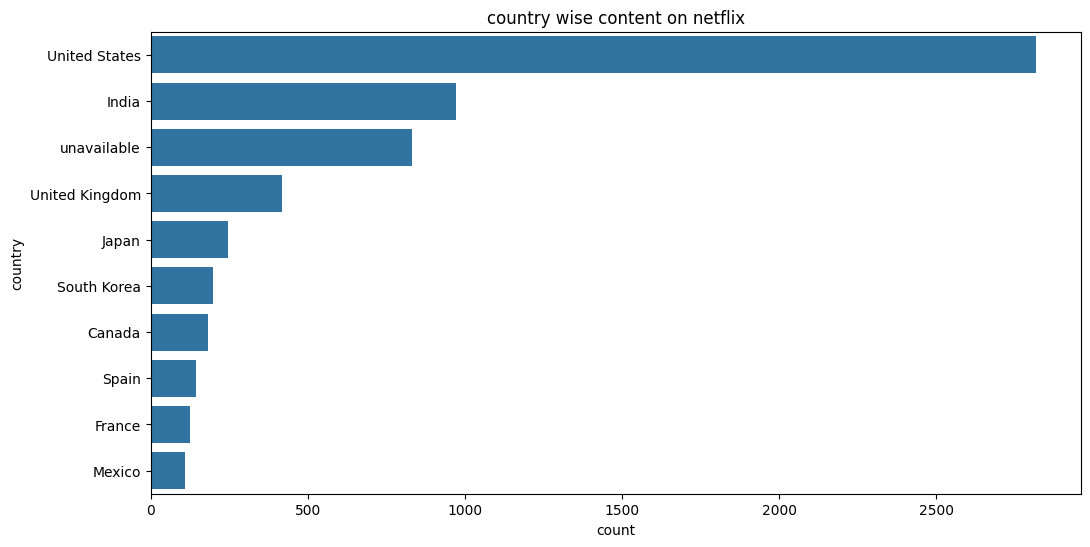

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=data['country'].value_counts().index[0:10],data=data)
plt.title('country wise content on netflix')

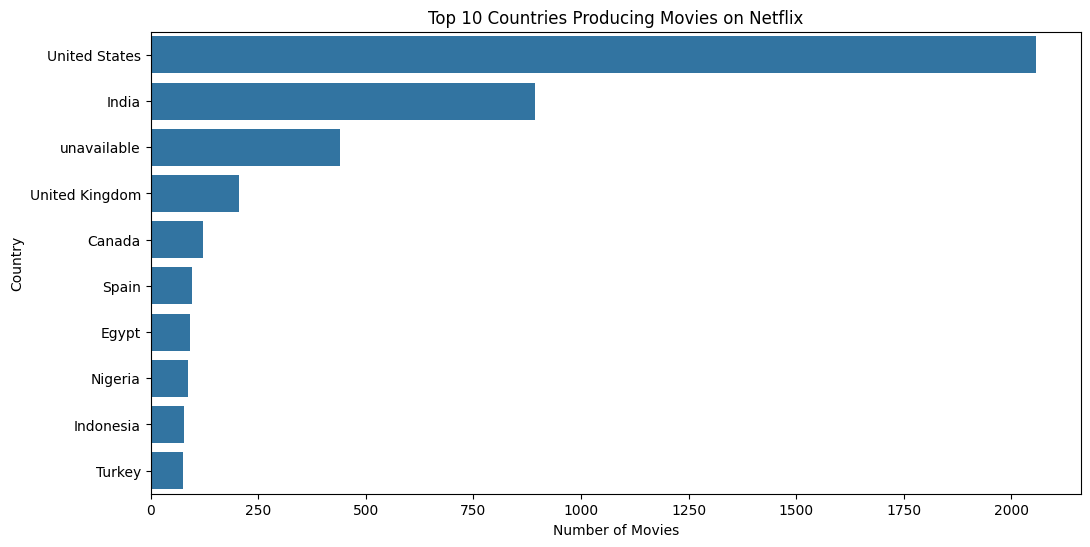

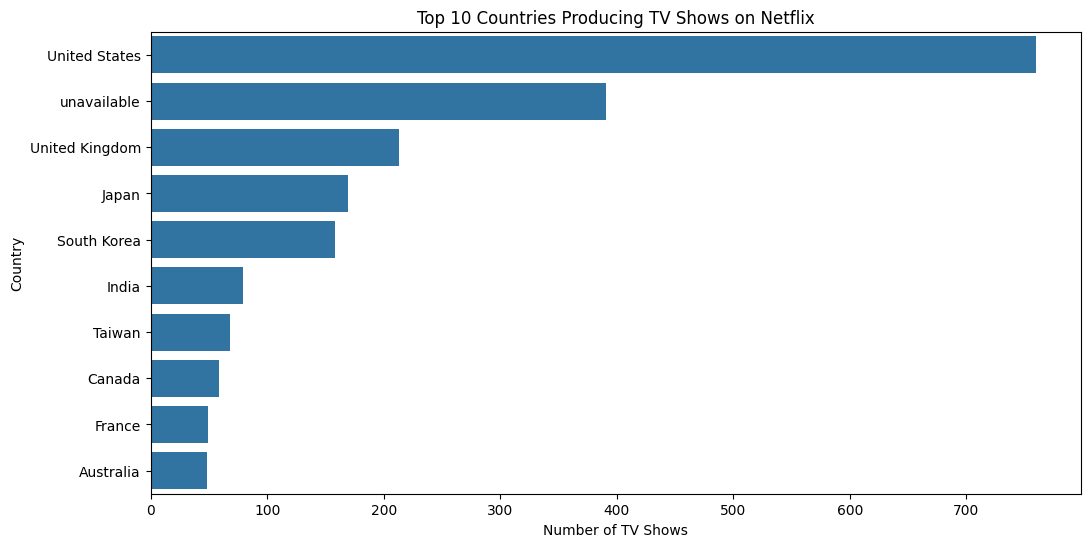

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing Netflix content with columns like 'type' and 'country'

# Filter data for movies and TV shows
movie_countries = data[data['type'] == 'Movie']
tv_show_countries = data[data['type'] == 'TV Show']

plt.figure(figsize=(12, 6))
sns.countplot(y='country', order=movie_countries['country'].value_counts().head(10).index, data=movie_countries)
plt.title('Top 10 Countries Producing Movies on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Country')

plt.figure(figsize=(12, 6))
sns.countplot(y='country', order=tv_show_countries['country'].value_counts().head(10).index, data=tv_show_countries)
plt.title('Top 10 Countries Producing TV Shows on Netflix')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')

plt.show()

In [37]:
data.rating.value_counts()

rating
TV-MA         3207
TV-14         2160
TV-PG          863
R              799
PG-13          490
TV-Y7          334
TV-Y           307
PG             287
TV-G           220
NR              80
G               41
TV-Y7-FV         6
unavailabe       4
NC-17            3
UR               3
74 min           1
84 min           1
66 min           1
Name: count, dtype: int64

Text(0.5, 1.0, 'rating of shows on netflix vs count')

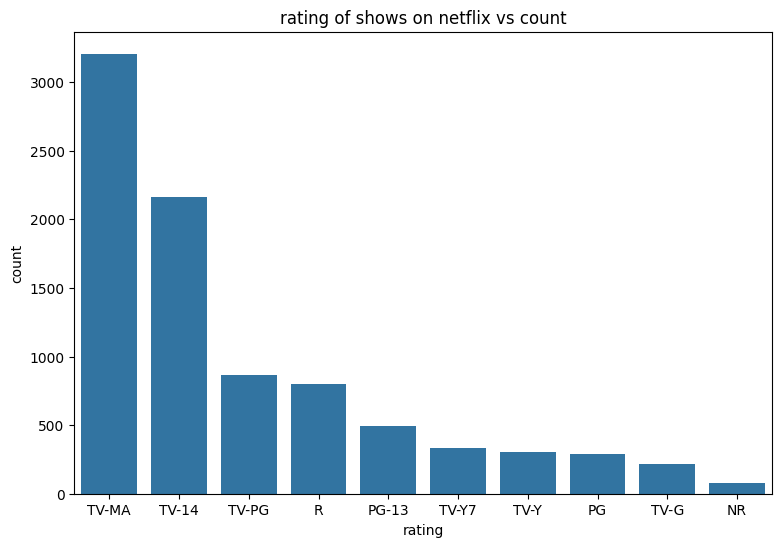

In [38]:
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=data['rating'].value_counts().index[0:10],data=data)
plt.title('rating of shows on netflix vs count')

In [39]:
data.release_year.value_counts()[:20]

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: count, dtype: int64

Text(0.5, 1.0, 'content relese in years on netflix vs count')

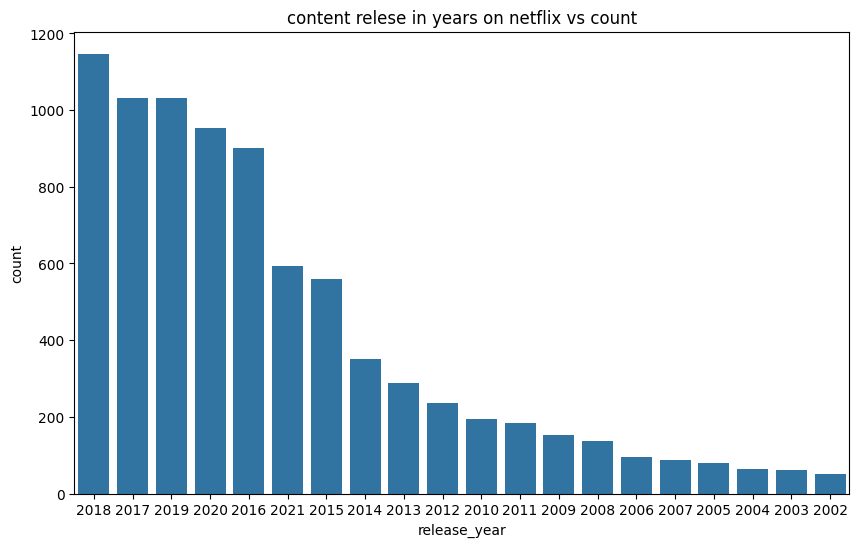

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_year',order=data['release_year'].value_counts().index[0:20],data=data)
plt.title('content relese in years on netflix vs count')

Text(0.5, 1.0, 'top 20 genre on netflix')

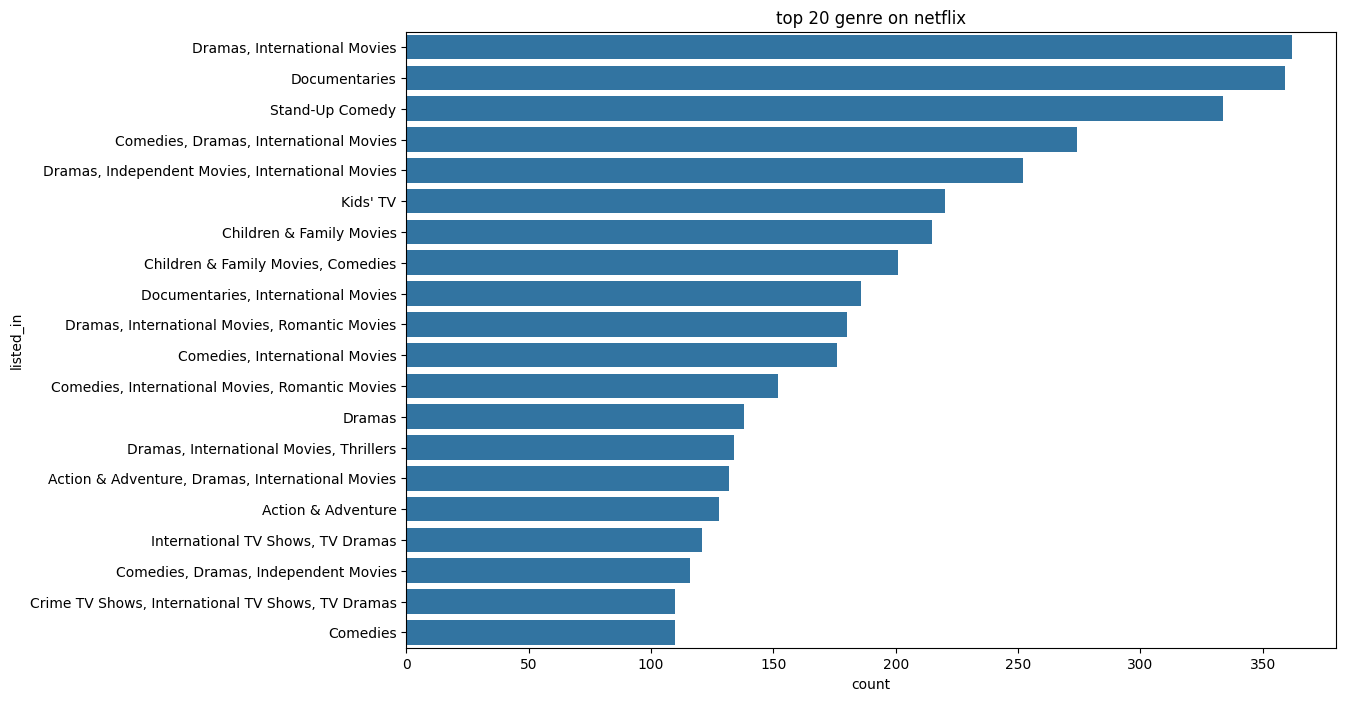

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in',order=data['listed_in'].value_counts().index[0:20],data=data)
plt.title('top 20 genre on netflix')

1. netflix has more movies thann tv shows
2. most numbers of movies and tv shows are produced by us,foloowed by india who has produced the second most number of movies in netflix
3. most of the content on netflix(movies and tv shows )is for mature audiences
4. 2018 is the year in which released alot more content as compared to others years
5. internationlmovies and dramas are the most genre on netflix.